# WGAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGAN import WGAN
from utils.loaders import load_cifar



Using TensorFlow backend.


In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0002'
DATA_NAME = 'horses'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #


## data

In [3]:
if DATA_NAME == 'cars':
    label = 1
elif DATA_NAME == 'horses':
    label = 7
(x_train, y_train) = load_cifar(label, 10)


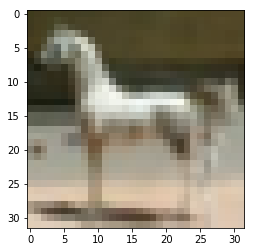

In [4]:
plt.imshow((x_train[150,:,:,:]+1)/2)

## architecture

In [5]:

if mode == 'build':

    gan = WGAN(input_dim = (32,32,3)
            , critic_conv_filters = [32,64,128,128]
            , critic_conv_kernel_size = [5,5,5,5]
            , critic_conv_strides = [2,2,2,1]
            , critic_batch_norm_momentum = None
            , critic_activation = 'leaky_relu'
            , critic_dropout_rate = None
            , critic_learning_rate = 0.00005
            , generator_initial_dense_layer_size = (4, 4, 128)
            , generator_upsample = [2,2, 2,1]
            , generator_conv_filters = [128,64,32,3]
            , generator_conv_kernel_size = [5,5,5,5]
            , generator_conv_strides = [1,1, 1,1]
            , generator_batch_norm_momentum = 0.8
            , generator_activation = 'leaky_relu'
            , generator_dropout_rate = None
            , generator_learning_rate = 0.00005
            , optimiser = 'rmsprop'
            , z_dim = 100
            )
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))








W0606 21:35:09.421556 140246592935680 deprecation.py:506] From /home/comadan/.venv/gdl/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
gan.critic.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 32, 32, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 16, 16, 32)        2432      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 8, 8, 64)          51264     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 4, 4, 128)         0   

In [7]:
gan.generator.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              206848    
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 2048)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 128)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 8, 8, 128)         0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 8, 8, 128)         4097

## training

In [8]:
BATCH_SIZE = 128
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
CLIP_THRESHOLD = 0.01

In [9]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , clip_threshold = CLIP_THRESHOLD
)

W0606 21:35:12.407164 140246592935680 module_wrapper.py:139] From /home/comadan/.venv/gdl/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

/home/comadan/.venv/gdl/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: (-0.000)(R -0.001, F 0.000)]  [G loss: -0.000] 


/home/comadan/.venv/gdl/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: (-0.001)(R -0.001, F 0.000)]  [G loss: -0.001] 
2 [D loss: (-0.002)(R -0.004, F 0.001)]  [G loss: -0.003] 
3 [D loss: (-0.005)(R -0.011, F 0.002)]  [G loss: -0.010] 
4 [D loss: (-0.010)(R -0.026, F 0.007)]  [G loss: -0.026] 
5 [D loss: (-0.018)(R -0.054, F 0.018)]  [G loss: -0.061] 
6 [D loss: (-0.020)(R -0.084, F 0.043)]  [G loss: -0.105] 
7 [D loss: (-0.023)(R -0.117, F 0.071)]  [G loss: -0.155] 
8 [D loss: (-0.017)(R -0.134, F 0.100)]  [G loss: -0.203] 
9 [D loss: (-0.021)(R -0.151, F 0.109)]  [G loss: -0.256] 
10 [D loss: (-0.031)(R -0.186, F 0.124)]  [G loss: -0.322] 
11 [D loss: (-0.048)(R -0.242, F 0.145)]  [G loss: -0.423] 
12 [D loss: (-0.053)(R -0.283, F 0.176)]  [G loss: -0.520] 
13 [D loss: (-0.067)(R -0.343, F 0.208)]  [G loss: -0.640] 
14 [D loss: (-0.081)(R -0.396, F 0.235)]  [G loss: -0.770] 
15 [D loss: (-0.064)(R -0.430, F 0.303)]  [G loss: -0.876] 
16 [D loss: (-0.060)(R -0.460, F 0.340)]  [G loss: -0.944] 
17 [D loss: (-0.052)(R -0.469, F 0.364)]  [G loss

139 [D loss: (0.022)(R 0.122, F -0.077)]  [G loss: 0.137] 
140 [D loss: (-0.002)(R 0.085, F -0.090)]  [G loss: 0.075] 
141 [D loss: (-0.017)(R 0.025, F -0.059)]  [G loss: 0.049] 
142 [D loss: (-0.025)(R 0.026, F -0.077)]  [G loss: 0.072] 
143 [D loss: (-0.044)(R 0.020, F -0.107)]  [G loss: 0.119] 
144 [D loss: (-0.038)(R 0.022, F -0.097)]  [G loss: 0.151] 
145 [D loss: (-0.060)(R 0.008, F -0.128)]  [G loss: 0.191] 
146 [D loss: (-0.084)(R 0.003, F -0.170)]  [G loss: 0.219] 
147 [D loss: (-0.058)(R 0.043, F -0.159)]  [G loss: 0.195] 
148 [D loss: (-0.032)(R 0.033, F -0.096)]  [G loss: 0.140] 
149 [D loss: (-0.052)(R -0.012, F -0.091)]  [G loss: 0.129] 
150 [D loss: (-0.070)(R -0.012, F -0.128)]  [G loss: 0.159] 
151 [D loss: (-0.104)(R -0.006, F -0.202)]  [G loss: 0.240] 
152 [D loss: (-0.106)(R 0.027, F -0.238)]  [G loss: 0.285] 
153 [D loss: (-0.056)(R -0.007, F -0.105)]  [G loss: 0.221] 
154 [D loss: (-0.015)(R -0.036, F 0.007)]  [G loss: 0.096] 
155 [D loss: (-0.005)(R -0.083, F 0.0

275 [D loss: (-0.049)(R -0.067, F -0.031)]  [G loss: 0.100] 
276 [D loss: (-0.040)(R -0.065, F -0.016)]  [G loss: 0.055] 
277 [D loss: (-0.015)(R -0.074, F 0.044)]  [G loss: -0.022] 
278 [D loss: (-0.063)(R -0.135, F 0.009)]  [G loss: -0.075] 
279 [D loss: (-0.077)(R -0.150, F -0.003)]  [G loss: -0.075] 
280 [D loss: (-0.062)(R -0.162, F 0.038)]  [G loss: -0.071] 
281 [D loss: (-0.038)(R -0.182, F 0.106)]  [G loss: -0.114] 
282 [D loss: (0.023)(R -0.180, F 0.226)]  [G loss: -0.156] 
283 [D loss: (0.011)(R -0.181, F 0.203)]  [G loss: -0.140] 
284 [D loss: (-0.020)(R -0.171, F 0.130)]  [G loss: -0.101] 
285 [D loss: (-0.014)(R -0.180, F 0.151)]  [G loss: -0.113] 
286 [D loss: (0.014)(R -0.192, F 0.220)]  [G loss: -0.199] 
287 [D loss: (0.004)(R -0.217, F 0.225)]  [G loss: -0.276] 
288 [D loss: (-0.003)(R -0.230, F 0.223)]  [G loss: -0.262] 
289 [D loss: (-0.056)(R -0.267, F 0.155)]  [G loss: -0.222] 
290 [D loss: (-0.064)(R -0.261, F 0.132)]  [G loss: -0.197] 
291 [D loss: (0.015)(R -0.2

411 [D loss: (0.005)(R -0.088, F 0.097)]  [G loss: -0.080] 
412 [D loss: (0.001)(R -0.088, F 0.091)]  [G loss: -0.070] 
413 [D loss: (-0.002)(R -0.081, F 0.077)]  [G loss: -0.049] 
414 [D loss: (-0.010)(R -0.080, F 0.059)]  [G loss: -0.043] 
415 [D loss: (-0.015)(R -0.079, F 0.048)]  [G loss: -0.032] 
416 [D loss: (-0.005)(R -0.069, F 0.060)]  [G loss: -0.028] 
417 [D loss: (-0.012)(R -0.068, F 0.044)]  [G loss: -0.018] 
418 [D loss: (-0.014)(R -0.053, F 0.025)]  [G loss: -0.001] 
419 [D loss: (-0.011)(R -0.054, F 0.031)]  [G loss: -0.008] 
420 [D loss: (-0.017)(R -0.052, F 0.017)]  [G loss: 0.006] 
421 [D loss: (-0.020)(R -0.046, F 0.005)]  [G loss: 0.024] 
422 [D loss: (-0.016)(R -0.039, F 0.008)]  [G loss: 0.014] 
423 [D loss: (-0.015)(R -0.043, F 0.013)]  [G loss: -0.001] 
424 [D loss: (-0.009)(R -0.035, F 0.017)]  [G loss: 0.004] 
425 [D loss: (-0.009)(R -0.038, F 0.019)]  [G loss: 0.008] 
426 [D loss: (-0.023)(R -0.041, F -0.006)]  [G loss: 0.027] 
427 [D loss: (-0.012)(R -0.037,

546 [D loss: (-0.012)(R -0.092, F 0.068)]  [G loss: -0.036] 
547 [D loss: (-0.012)(R -0.078, F 0.054)]  [G loss: -0.021] 
548 [D loss: (-0.018)(R -0.072, F 0.036)]  [G loss: -0.014] 
549 [D loss: (-0.011)(R -0.086, F 0.064)]  [G loss: -0.040] 
550 [D loss: (-0.008)(R -0.073, F 0.056)]  [G loss: -0.045] 
551 [D loss: (-0.008)(R -0.068, F 0.053)]  [G loss: -0.041] 
552 [D loss: (-0.002)(R -0.067, F 0.063)]  [G loss: -0.045] 
553 [D loss: (0.008)(R -0.059, F 0.075)]  [G loss: -0.063] 
554 [D loss: (0.001)(R -0.072, F 0.074)]  [G loss: -0.056] 
555 [D loss: (-0.000)(R -0.073, F 0.072)]  [G loss: -0.050] 
556 [D loss: (-0.017)(R -0.076, F 0.041)]  [G loss: -0.031] 
557 [D loss: (-0.014)(R -0.071, F 0.043)]  [G loss: -0.031] 
558 [D loss: (-0.010)(R -0.058, F 0.039)]  [G loss: -0.025] 
559 [D loss: (-0.017)(R -0.062, F 0.028)]  [G loss: -0.007] 
560 [D loss: (-0.009)(R -0.051, F 0.033)]  [G loss: -0.000] 
561 [D loss: (-0.015)(R -0.060, F 0.031)]  [G loss: 0.003] 
562 [D loss: (-0.011)(R -0.

681 [D loss: (-0.024)(R -0.074, F 0.025)]  [G loss: -0.017] 
682 [D loss: (-0.026)(R -0.067, F 0.014)]  [G loss: -0.022] 
683 [D loss: (-0.030)(R -0.081, F 0.022)]  [G loss: -0.036] 
684 [D loss: (-0.002)(R -0.065, F 0.061)]  [G loss: -0.026] 
685 [D loss: (-0.013)(R -0.083, F 0.057)]  [G loss: -0.027] 
686 [D loss: (-0.007)(R -0.077, F 0.064)]  [G loss: -0.032] 
687 [D loss: (-0.018)(R -0.079, F 0.043)]  [G loss: -0.041] 
688 [D loss: (-0.024)(R -0.087, F 0.040)]  [G loss: -0.031] 
689 [D loss: (-0.011)(R -0.078, F 0.056)]  [G loss: -0.046] 
690 [D loss: (-0.015)(R -0.083, F 0.052)]  [G loss: -0.047] 
691 [D loss: (-0.021)(R -0.077, F 0.036)]  [G loss: -0.028] 
692 [D loss: (-0.022)(R -0.077, F 0.033)]  [G loss: -0.028] 
693 [D loss: (-0.026)(R -0.084, F 0.032)]  [G loss: -0.007] 
694 [D loss: (-0.027)(R -0.075, F 0.021)]  [G loss: -0.008] 
695 [D loss: (-0.027)(R -0.077, F 0.022)]  [G loss: -0.021] 
696 [D loss: (-0.030)(R -0.081, F 0.021)]  [G loss: -0.034] 
697 [D loss: (-0.018)(R 

816 [D loss: (-0.020)(R -0.102, F 0.063)]  [G loss: -0.036] 
817 [D loss: (-0.015)(R -0.100, F 0.070)]  [G loss: -0.046] 
818 [D loss: (-0.012)(R -0.098, F 0.073)]  [G loss: -0.045] 
819 [D loss: (-0.008)(R -0.090, F 0.073)]  [G loss: -0.049] 
820 [D loss: (-0.016)(R -0.102, F 0.070)]  [G loss: -0.056] 
821 [D loss: (-0.012)(R -0.102, F 0.078)]  [G loss: -0.048] 
822 [D loss: (-0.013)(R -0.107, F 0.081)]  [G loss: -0.055] 
823 [D loss: (-0.007)(R -0.105, F 0.092)]  [G loss: -0.056] 
824 [D loss: (-0.018)(R -0.106, F 0.070)]  [G loss: -0.047] 
825 [D loss: (-0.014)(R -0.099, F 0.072)]  [G loss: -0.045] 
826 [D loss: (-0.022)(R -0.108, F 0.064)]  [G loss: -0.043] 
827 [D loss: (-0.023)(R -0.108, F 0.061)]  [G loss: -0.036] 
828 [D loss: (-0.016)(R -0.104, F 0.072)]  [G loss: -0.051] 
829 [D loss: (-0.018)(R -0.100, F 0.065)]  [G loss: -0.044] 
830 [D loss: (-0.020)(R -0.103, F 0.063)]  [G loss: -0.038] 
831 [D loss: (-0.014)(R -0.102, F 0.075)]  [G loss: -0.046] 
832 [D loss: (-0.024)(R 

951 [D loss: (-0.016)(R -0.106, F 0.075)]  [G loss: -0.065] 
952 [D loss: (-0.013)(R -0.104, F 0.077)]  [G loss: -0.050] 
953 [D loss: (-0.016)(R -0.103, F 0.072)]  [G loss: -0.041] 
954 [D loss: (-0.021)(R -0.099, F 0.058)]  [G loss: -0.037] 
955 [D loss: (-0.019)(R -0.087, F 0.049)]  [G loss: -0.020] 
956 [D loss: (-0.022)(R -0.081, F 0.036)]  [G loss: -0.018] 
957 [D loss: (-0.019)(R -0.082, F 0.044)]  [G loss: -0.022] 
958 [D loss: (-0.011)(R -0.074, F 0.052)]  [G loss: -0.026] 
959 [D loss: (-0.013)(R -0.071, F 0.044)]  [G loss: -0.022] 
960 [D loss: (-0.021)(R -0.078, F 0.036)]  [G loss: -0.019] 
961 [D loss: (-0.013)(R -0.067, F 0.040)]  [G loss: -0.019] 
962 [D loss: (-0.013)(R -0.075, F 0.050)]  [G loss: -0.023] 
963 [D loss: (-0.011)(R -0.076, F 0.053)]  [G loss: -0.022] 
964 [D loss: (-0.013)(R -0.074, F 0.049)]  [G loss: -0.018] 
965 [D loss: (-0.010)(R -0.079, F 0.058)]  [G loss: -0.035] 
966 [D loss: (-0.010)(R -0.082, F 0.062)]  [G loss: -0.034] 
967 [D loss: (-0.011)(R 

1084 [D loss: (-0.010)(R -0.083, F 0.063)]  [G loss: -0.040] 
1085 [D loss: (-0.015)(R -0.091, F 0.061)]  [G loss: -0.029] 
1086 [D loss: (-0.007)(R -0.082, F 0.068)]  [G loss: -0.043] 
1087 [D loss: (-0.015)(R -0.094, F 0.065)]  [G loss: -0.035] 
1088 [D loss: (-0.012)(R -0.074, F 0.050)]  [G loss: -0.034] 
1089 [D loss: (-0.005)(R -0.084, F 0.073)]  [G loss: -0.040] 
1090 [D loss: (-0.012)(R -0.094, F 0.069)]  [G loss: -0.043] 
1091 [D loss: (-0.012)(R -0.089, F 0.065)]  [G loss: -0.040] 
1092 [D loss: (-0.012)(R -0.084, F 0.061)]  [G loss: -0.036] 
1093 [D loss: (-0.010)(R -0.080, F 0.059)]  [G loss: -0.035] 
1094 [D loss: (-0.017)(R -0.086, F 0.051)]  [G loss: -0.034] 
1095 [D loss: (-0.013)(R -0.081, F 0.055)]  [G loss: -0.029] 
1096 [D loss: (-0.010)(R -0.083, F 0.063)]  [G loss: -0.033] 
1097 [D loss: (-0.018)(R -0.088, F 0.053)]  [G loss: -0.033] 
1098 [D loss: (-0.014)(R -0.090, F 0.062)]  [G loss: -0.030] 
1099 [D loss: (-0.013)(R -0.088, F 0.062)]  [G loss: -0.049] 
1100 [D 

1217 [D loss: (-0.028)(R -0.102, F 0.047)]  [G loss: -0.021] 
1218 [D loss: (-0.016)(R -0.101, F 0.068)]  [G loss: -0.046] 
1219 [D loss: (-0.021)(R -0.099, F 0.056)]  [G loss: -0.036] 
1220 [D loss: (-0.023)(R -0.101, F 0.056)]  [G loss: -0.034] 
1221 [D loss: (-0.018)(R -0.103, F 0.066)]  [G loss: -0.030] 
1222 [D loss: (-0.014)(R -0.098, F 0.070)]  [G loss: -0.035] 
1223 [D loss: (-0.013)(R -0.095, F 0.069)]  [G loss: -0.050] 
1224 [D loss: (-0.018)(R -0.099, F 0.064)]  [G loss: -0.043] 
1225 [D loss: (-0.027)(R -0.107, F 0.052)]  [G loss: -0.034] 
1226 [D loss: (-0.017)(R -0.099, F 0.065)]  [G loss: -0.052] 
1227 [D loss: (-0.019)(R -0.108, F 0.070)]  [G loss: -0.057] 
1228 [D loss: (-0.025)(R -0.107, F 0.058)]  [G loss: -0.026] 
1229 [D loss: (-0.020)(R -0.105, F 0.064)]  [G loss: -0.040] 
1230 [D loss: (-0.015)(R -0.101, F 0.070)]  [G loss: -0.040] 
1231 [D loss: (-0.023)(R -0.105, F 0.060)]  [G loss: -0.032] 
1232 [D loss: (-0.022)(R -0.100, F 0.057)]  [G loss: -0.033] 
1233 [D 

1350 [D loss: (-0.029)(R -0.125, F 0.067)]  [G loss: -0.044] 
1351 [D loss: (-0.018)(R -0.112, F 0.075)]  [G loss: -0.055] 
1352 [D loss: (-0.017)(R -0.114, F 0.080)]  [G loss: -0.052] 
1353 [D loss: (-0.024)(R -0.115, F 0.068)]  [G loss: -0.033] 
1354 [D loss: (-0.020)(R -0.113, F 0.072)]  [G loss: -0.046] 
1355 [D loss: (-0.014)(R -0.111, F 0.082)]  [G loss: -0.049] 
1356 [D loss: (-0.028)(R -0.119, F 0.062)]  [G loss: -0.040] 
1357 [D loss: (-0.030)(R -0.112, F 0.051)]  [G loss: -0.035] 
1358 [D loss: (-0.022)(R -0.109, F 0.064)]  [G loss: -0.038] 
1359 [D loss: (-0.016)(R -0.098, F 0.065)]  [G loss: -0.045] 
1360 [D loss: (-0.021)(R -0.112, F 0.070)]  [G loss: -0.040] 
1361 [D loss: (-0.018)(R -0.113, F 0.077)]  [G loss: -0.045] 
1362 [D loss: (-0.017)(R -0.108, F 0.075)]  [G loss: -0.035] 
1363 [D loss: (-0.023)(R -0.097, F 0.051)]  [G loss: -0.025] 
1364 [D loss: (-0.027)(R -0.110, F 0.056)]  [G loss: -0.042] 
1365 [D loss: (-0.014)(R -0.100, F 0.072)]  [G loss: -0.057] 
1366 [D 

1483 [D loss: (-0.036)(R -0.109, F 0.037)]  [G loss: -0.014] 
1484 [D loss: (-0.014)(R -0.099, F 0.071)]  [G loss: -0.036] 
1485 [D loss: (-0.014)(R -0.109, F 0.082)]  [G loss: -0.044] 
1486 [D loss: (-0.018)(R -0.098, F 0.062)]  [G loss: -0.006] 
1487 [D loss: (-0.032)(R -0.096, F 0.031)]  [G loss: 0.008] 
1488 [D loss: (-0.042)(R -0.117, F 0.033)]  [G loss: -0.021] 
1489 [D loss: (0.003)(R -0.091, F 0.097)]  [G loss: -0.048] 
1490 [D loss: (-0.028)(R -0.112, F 0.056)]  [G loss: -0.040] 
1491 [D loss: (-0.025)(R -0.110, F 0.060)]  [G loss: -0.031] 
1492 [D loss: (-0.044)(R -0.120, F 0.032)]  [G loss: -0.014] 
1493 [D loss: (-0.032)(R -0.100, F 0.036)]  [G loss: -0.021] 
1494 [D loss: (-0.038)(R -0.119, F 0.042)]  [G loss: -0.017] 
1495 [D loss: (-0.011)(R -0.111, F 0.089)]  [G loss: -0.059] 
1496 [D loss: (-0.019)(R -0.113, F 0.075)]  [G loss: -0.035] 
1497 [D loss: (-0.033)(R -0.115, F 0.048)]  [G loss: -0.018] 
1498 [D loss: (-0.031)(R -0.112, F 0.050)]  [G loss: -0.031] 
1499 [D lo

1616 [D loss: (-0.019)(R -0.108, F 0.070)]  [G loss: -0.029] 
1617 [D loss: (-0.027)(R -0.129, F 0.075)]  [G loss: -0.048] 
1618 [D loss: (-0.030)(R -0.139, F 0.080)]  [G loss: -0.038] 
1619 [D loss: (-0.016)(R -0.131, F 0.098)]  [G loss: -0.078] 
1620 [D loss: (-0.029)(R -0.153, F 0.096)]  [G loss: -0.065] 
1621 [D loss: (-0.026)(R -0.133, F 0.081)]  [G loss: -0.044] 
1622 [D loss: (-0.034)(R -0.104, F 0.037)]  [G loss: -0.014] 
1623 [D loss: (-0.030)(R -0.109, F 0.048)]  [G loss: -0.036] 
1624 [D loss: (-0.015)(R -0.102, F 0.071)]  [G loss: -0.016] 
1625 [D loss: (-0.029)(R -0.103, F 0.044)]  [G loss: -0.013] 
1626 [D loss: (-0.035)(R -0.109, F 0.039)]  [G loss: -0.042] 
1627 [D loss: (-0.015)(R -0.112, F 0.082)]  [G loss: -0.054] 
1628 [D loss: (-0.023)(R -0.074, F 0.028)]  [G loss: 0.005] 
1629 [D loss: (-0.022)(R -0.089, F 0.045)]  [G loss: -0.002] 
1630 [D loss: (-0.033)(R -0.084, F 0.018)]  [G loss: 0.008] 
1631 [D loss: (-0.021)(R -0.097, F 0.055)]  [G loss: -0.024] 
1632 [D lo

1749 [D loss: (-0.039)(R -0.098, F 0.020)]  [G loss: 0.008] 
1750 [D loss: (-0.041)(R -0.106, F 0.024)]  [G loss: -0.011] 
1751 [D loss: (-0.020)(R -0.109, F 0.069)]  [G loss: -0.039] 
1752 [D loss: (-0.022)(R -0.084, F 0.040)]  [G loss: -0.037] 
1753 [D loss: (-0.028)(R -0.101, F 0.045)]  [G loss: -0.015] 
1754 [D loss: (-0.023)(R -0.105, F 0.059)]  [G loss: -0.020] 
1755 [D loss: (-0.017)(R -0.092, F 0.058)]  [G loss: -0.034] 
1756 [D loss: (-0.026)(R -0.105, F 0.053)]  [G loss: -0.043] 
1757 [D loss: (-0.024)(R -0.107, F 0.058)]  [G loss: -0.036] 
1758 [D loss: (-0.024)(R -0.103, F 0.054)]  [G loss: -0.016] 
1759 [D loss: (-0.039)(R -0.112, F 0.034)]  [G loss: -0.004] 
1760 [D loss: (-0.016)(R -0.089, F 0.056)]  [G loss: -0.028] 
1761 [D loss: (-0.018)(R -0.091, F 0.056)]  [G loss: -0.030] 
1762 [D loss: (-0.018)(R -0.103, F 0.068)]  [G loss: -0.028] 
1763 [D loss: (-0.013)(R -0.077, F 0.052)]  [G loss: -0.025] 
1764 [D loss: (-0.030)(R -0.094, F 0.033)]  [G loss: -0.018] 
1765 [D l

1882 [D loss: (-0.051)(R -0.124, F 0.021)]  [G loss: -0.025] 
1883 [D loss: (-0.026)(R -0.105, F 0.053)]  [G loss: -0.035] 
1884 [D loss: (-0.040)(R -0.118, F 0.038)]  [G loss: -0.039] 
1885 [D loss: (-0.032)(R -0.119, F 0.056)]  [G loss: -0.060] 
1886 [D loss: (-0.030)(R -0.119, F 0.058)]  [G loss: -0.056] 
1887 [D loss: (-0.011)(R -0.095, F 0.074)]  [G loss: -0.034] 
1888 [D loss: (-0.039)(R -0.128, F 0.050)]  [G loss: -0.013] 
1889 [D loss: (-0.027)(R -0.089, F 0.034)]  [G loss: -0.019] 
1890 [D loss: (-0.031)(R -0.092, F 0.029)]  [G loss: 0.000] 
1891 [D loss: (-0.020)(R -0.093, F 0.052)]  [G loss: -0.009] 
1892 [D loss: (-0.026)(R -0.105, F 0.052)]  [G loss: -0.032] 
1893 [D loss: (-0.026)(R -0.092, F 0.041)]  [G loss: -0.022] 
1894 [D loss: (-0.025)(R -0.094, F 0.044)]  [G loss: -0.035] 
1895 [D loss: (-0.018)(R -0.086, F 0.050)]  [G loss: -0.022] 
1896 [D loss: (-0.019)(R -0.087, F 0.049)]  [G loss: -0.015] 
1897 [D loss: (-0.031)(R -0.101, F 0.039)]  [G loss: -0.004] 
1898 [D l

2015 [D loss: (-0.025)(R -0.101, F 0.051)]  [G loss: -0.019] 
2016 [D loss: (-0.027)(R -0.103, F 0.050)]  [G loss: -0.004] 
2017 [D loss: (-0.029)(R -0.096, F 0.038)]  [G loss: -0.022] 
2018 [D loss: (-0.027)(R -0.111, F 0.057)]  [G loss: -0.029] 
2019 [D loss: (-0.053)(R -0.109, F 0.002)]  [G loss: 0.023] 
2020 [D loss: (-0.032)(R -0.059, F -0.005)]  [G loss: 0.003] 
2021 [D loss: (-0.015)(R -0.079, F 0.049)]  [G loss: -0.013] 
2022 [D loss: (-0.020)(R -0.084, F 0.043)]  [G loss: -0.022] 
2023 [D loss: (-0.048)(R -0.113, F 0.017)]  [G loss: 0.002] 
2024 [D loss: (-0.023)(R -0.090, F 0.043)]  [G loss: -0.025] 
2025 [D loss: (-0.012)(R -0.081, F 0.057)]  [G loss: -0.016] 
2026 [D loss: (-0.025)(R -0.072, F 0.022)]  [G loss: -0.001] 
2027 [D loss: (-0.027)(R -0.088, F 0.035)]  [G loss: 0.004] 
2028 [D loss: (-0.025)(R -0.077, F 0.027)]  [G loss: 0.005] 
2029 [D loss: (-0.037)(R -0.083, F 0.009)]  [G loss: 0.006] 
2030 [D loss: (-0.021)(R -0.062, F 0.019)]  [G loss: -0.006] 
2031 [D loss:

2148 [D loss: (-0.011)(R -0.091, F 0.069)]  [G loss: -0.020] 
2149 [D loss: (-0.027)(R -0.075, F 0.021)]  [G loss: 0.020] 
2150 [D loss: (-0.025)(R -0.083, F 0.033)]  [G loss: 0.006] 
2151 [D loss: (-0.009)(R -0.063, F 0.045)]  [G loss: 0.005] 
2152 [D loss: (-0.042)(R -0.065, F -0.018)]  [G loss: 0.001] 
2153 [D loss: (-0.010)(R -0.054, F 0.033)]  [G loss: -0.007] 
2154 [D loss: (-0.025)(R -0.084, F 0.034)]  [G loss: -0.012] 
2155 [D loss: (-0.012)(R -0.065, F 0.040)]  [G loss: 0.006] 
2156 [D loss: (-0.023)(R -0.061, F 0.016)]  [G loss: 0.006] 
2157 [D loss: (-0.018)(R -0.065, F 0.029)]  [G loss: 0.015] 
2158 [D loss: (-0.025)(R -0.042, F -0.009)]  [G loss: 0.043] 
2159 [D loss: (-0.034)(R -0.067, F -0.000)]  [G loss: 0.040] 
2160 [D loss: (-0.018)(R -0.065, F 0.029)]  [G loss: -0.002] 
2161 [D loss: (-0.021)(R -0.068, F 0.026)]  [G loss: 0.009] 
2162 [D loss: (-0.030)(R -0.052, F -0.007)]  [G loss: 0.019] 
2163 [D loss: (-0.035)(R -0.079, F 0.009)]  [G loss: -0.012] 
2164 [D loss: (

2281 [D loss: (-0.029)(R -0.102, F 0.045)]  [G loss: -0.034] 
2282 [D loss: (-0.022)(R -0.058, F 0.014)]  [G loss: 0.036] 
2283 [D loss: (-0.026)(R -0.042, F -0.010)]  [G loss: 0.075] 
2284 [D loss: (-0.028)(R -0.054, F -0.001)]  [G loss: 0.031] 
2285 [D loss: (-0.020)(R -0.065, F 0.025)]  [G loss: 0.011] 
2286 [D loss: (-0.013)(R -0.065, F 0.038)]  [G loss: -0.010] 
2287 [D loss: (-0.021)(R -0.087, F 0.044)]  [G loss: -0.003] 
2288 [D loss: (-0.031)(R -0.080, F 0.018)]  [G loss: -0.006] 
2289 [D loss: (-0.027)(R -0.094, F 0.040)]  [G loss: -0.036] 
2290 [D loss: (-0.019)(R -0.088, F 0.049)]  [G loss: -0.015] 
2291 [D loss: (-0.037)(R -0.088, F 0.015)]  [G loss: 0.015] 
2292 [D loss: (-0.055)(R -0.089, F -0.022)]  [G loss: 0.050] 
2293 [D loss: (-0.022)(R -0.067, F 0.023)]  [G loss: -0.012] 
2294 [D loss: (-0.027)(R -0.098, F 0.044)]  [G loss: -0.031] 
2295 [D loss: (-0.017)(R -0.100, F 0.066)]  [G loss: -0.041] 
2296 [D loss: (-0.034)(R -0.123, F 0.056)]  [G loss: -0.028] 
2297 [D los

2414 [D loss: (-0.013)(R -0.086, F 0.059)]  [G loss: -0.036] 
2415 [D loss: (-0.025)(R -0.096, F 0.045)]  [G loss: -0.022] 
2416 [D loss: (-0.053)(R -0.118, F 0.012)]  [G loss: 0.019] 
2417 [D loss: (-0.054)(R -0.126, F 0.018)]  [G loss: 0.012] 
2418 [D loss: (-0.013)(R -0.100, F 0.073)]  [G loss: -0.020] 
2419 [D loss: (-0.019)(R -0.122, F 0.085)]  [G loss: -0.061] 
2420 [D loss: (-0.027)(R -0.105, F 0.052)]  [G loss: -0.003] 
2421 [D loss: (-0.040)(R -0.065, F -0.015)]  [G loss: 0.062] 
2422 [D loss: (-0.051)(R -0.075, F -0.027)]  [G loss: 0.029] 
2423 [D loss: (-0.008)(R -0.080, F 0.063)]  [G loss: -0.011] 
2424 [D loss: (-0.025)(R -0.115, F 0.065)]  [G loss: -0.026] 
2425 [D loss: (-0.050)(R -0.103, F 0.003)]  [G loss: -0.020] 
2426 [D loss: (-0.021)(R -0.093, F 0.052)]  [G loss: -0.032] 
2427 [D loss: (-0.022)(R -0.108, F 0.065)]  [G loss: -0.037] 
2428 [D loss: (-0.026)(R -0.113, F 0.061)]  [G loss: -0.042] 
2429 [D loss: (-0.025)(R -0.094, F 0.043)]  [G loss: -0.014] 
2430 [D lo

2547 [D loss: (-0.044)(R -0.095, F 0.008)]  [G loss: -0.004] 
2548 [D loss: (-0.045)(R -0.107, F 0.016)]  [G loss: -0.040] 
2549 [D loss: (0.008)(R -0.082, F 0.098)]  [G loss: -0.061] 
2550 [D loss: (-0.005)(R -0.123, F 0.114)]  [G loss: -0.050] 
2551 [D loss: (-0.034)(R -0.116, F 0.047)]  [G loss: 0.007] 
2552 [D loss: (-0.053)(R -0.130, F 0.023)]  [G loss: 0.029] 
2553 [D loss: (-0.031)(R -0.121, F 0.059)]  [G loss: -0.012] 
2554 [D loss: (-0.025)(R -0.121, F 0.070)]  [G loss: -0.050] 
2555 [D loss: (-0.018)(R -0.120, F 0.083)]  [G loss: -0.043] 
2556 [D loss: (-0.056)(R -0.143, F 0.030)]  [G loss: -0.018] 
2557 [D loss: (-0.037)(R -0.103, F 0.030)]  [G loss: -0.017] 
2558 [D loss: (-0.035)(R -0.044, F -0.025)]  [G loss: 0.015] 
2559 [D loss: (-0.015)(R -0.057, F 0.027)]  [G loss: 0.011] 
2560 [D loss: (-0.008)(R -0.053, F 0.038)]  [G loss: -0.003] 
2561 [D loss: (-0.028)(R -0.080, F 0.023)]  [G loss: -0.003] 
2562 [D loss: (-0.013)(R -0.068, F 0.042)]  [G loss: -0.004] 
2563 [D loss

2680 [D loss: (-0.029)(R -0.106, F 0.049)]  [G loss: -0.025] 
2681 [D loss: (-0.027)(R -0.110, F 0.055)]  [G loss: -0.031] 
2682 [D loss: (-0.019)(R -0.103, F 0.065)]  [G loss: -0.026] 
2683 [D loss: (-0.045)(R -0.097, F 0.007)]  [G loss: -0.025] 
2684 [D loss: (-0.033)(R -0.074, F 0.007)]  [G loss: -0.030] 
2685 [D loss: (-0.039)(R -0.105, F 0.027)]  [G loss: -0.008] 
2686 [D loss: (-0.027)(R -0.065, F 0.011)]  [G loss: -0.022] 
2687 [D loss: (-0.022)(R -0.074, F 0.031)]  [G loss: -0.016] 
2688 [D loss: (-0.027)(R -0.076, F 0.022)]  [G loss: -0.027] 
2689 [D loss: (-0.014)(R -0.067, F 0.039)]  [G loss: -0.045] 
2690 [D loss: (-0.018)(R -0.094, F 0.059)]  [G loss: -0.022] 
2691 [D loss: (-0.026)(R -0.100, F 0.048)]  [G loss: -0.001] 
2692 [D loss: (-0.028)(R -0.084, F 0.028)]  [G loss: 0.006] 
2693 [D loss: (-0.039)(R -0.091, F 0.012)]  [G loss: 0.013] 
2694 [D loss: (-0.035)(R -0.109, F 0.040)]  [G loss: 0.004] 
2695 [D loss: (-0.020)(R -0.089, F 0.048)]  [G loss: -0.017] 
2696 [D los

2813 [D loss: (-0.020)(R -0.105, F 0.065)]  [G loss: -0.034] 
2814 [D loss: (-0.009)(R -0.089, F 0.071)]  [G loss: -0.026] 
2815 [D loss: (-0.023)(R -0.111, F 0.065)]  [G loss: -0.018] 
2816 [D loss: (-0.029)(R -0.108, F 0.050)]  [G loss: -0.022] 
2817 [D loss: (-0.020)(R -0.104, F 0.063)]  [G loss: -0.054] 
2818 [D loss: (-0.025)(R -0.105, F 0.055)]  [G loss: -0.043] 
2819 [D loss: (-0.008)(R -0.083, F 0.067)]  [G loss: -0.038] 
2820 [D loss: (-0.015)(R -0.079, F 0.049)]  [G loss: 0.005] 
2821 [D loss: (-0.025)(R -0.087, F 0.037)]  [G loss: 0.029] 
2822 [D loss: (-0.031)(R -0.063, F 0.001)]  [G loss: 0.022] 
2823 [D loss: (-0.027)(R -0.086, F 0.032)]  [G loss: -0.002] 
2824 [D loss: (-0.015)(R -0.077, F 0.047)]  [G loss: -0.029] 
2825 [D loss: (-0.013)(R -0.085, F 0.059)]  [G loss: -0.018] 
2826 [D loss: (-0.023)(R -0.105, F 0.059)]  [G loss: -0.023] 
2827 [D loss: (-0.033)(R -0.081, F 0.015)]  [G loss: -0.025] 
2828 [D loss: (-0.055)(R -0.136, F 0.026)]  [G loss: -0.033] 
2829 [D los

2946 [D loss: (-0.056)(R -0.145, F 0.033)]  [G loss: -0.115] 
2947 [D loss: (-0.056)(R -0.172, F 0.059)]  [G loss: -0.111] 
2948 [D loss: (-0.007)(R -0.115, F 0.100)]  [G loss: -0.123] 
2949 [D loss: (-0.012)(R -0.147, F 0.123)]  [G loss: -0.127] 
2950 [D loss: (-0.002)(R -0.134, F 0.129)]  [G loss: -0.107] 
2951 [D loss: (-0.010)(R -0.126, F 0.106)]  [G loss: -0.054] 
2952 [D loss: (-0.029)(R -0.119, F 0.062)]  [G loss: -0.031] 
2953 [D loss: (-0.046)(R -0.123, F 0.031)]  [G loss: 0.009] 
2954 [D loss: (-0.064)(R -0.120, F -0.009)]  [G loss: 0.017] 
2955 [D loss: (-0.079)(R -0.148, F -0.010)]  [G loss: -0.004] 
2956 [D loss: (-0.019)(R -0.091, F 0.054)]  [G loss: -0.006] 
2957 [D loss: (-0.030)(R -0.098, F 0.039)]  [G loss: -0.030] 
2958 [D loss: (-0.028)(R -0.107, F 0.051)]  [G loss: -0.030] 
2959 [D loss: (-0.008)(R -0.106, F 0.090)]  [G loss: -0.049] 
2960 [D loss: (-0.034)(R -0.127, F 0.059)]  [G loss: -0.037] 
2961 [D loss: (-0.047)(R -0.126, F 0.032)]  [G loss: -0.004] 
2962 [D 

3079 [D loss: (-0.014)(R -0.084, F 0.056)]  [G loss: -0.024] 
3080 [D loss: (-0.033)(R -0.121, F 0.055)]  [G loss: -0.034] 
3081 [D loss: (-0.026)(R -0.118, F 0.067)]  [G loss: -0.069] 
3082 [D loss: (-0.018)(R -0.140, F 0.103)]  [G loss: -0.066] 
3083 [D loss: (-0.033)(R -0.143, F 0.078)]  [G loss: -0.063] 
3084 [D loss: (-0.023)(R -0.133, F 0.086)]  [G loss: -0.084] 
3085 [D loss: (-0.025)(R -0.142, F 0.092)]  [G loss: -0.082] 
3086 [D loss: (-0.031)(R -0.174, F 0.112)]  [G loss: -0.092] 
3087 [D loss: (-0.026)(R -0.153, F 0.102)]  [G loss: -0.088] 
3088 [D loss: (-0.015)(R -0.148, F 0.118)]  [G loss: -0.066] 
3089 [D loss: (-0.012)(R -0.134, F 0.110)]  [G loss: -0.076] 
3090 [D loss: (-0.032)(R -0.138, F 0.074)]  [G loss: -0.034] 
3091 [D loss: (-0.025)(R -0.097, F 0.046)]  [G loss: -0.036] 
3092 [D loss: (-0.066)(R -0.157, F 0.025)]  [G loss: -0.014] 
3093 [D loss: (-0.023)(R -0.091, F 0.045)]  [G loss: -0.031] 
3094 [D loss: (-0.027)(R -0.079, F 0.025)]  [G loss: -0.011] 
3095 [D 

3212 [D loss: (-0.028)(R -0.117, F 0.060)]  [G loss: -0.030] 
3213 [D loss: (-0.048)(R -0.118, F 0.023)]  [G loss: -0.011] 
3214 [D loss: (-0.050)(R -0.105, F 0.004)]  [G loss: 0.005] 
3215 [D loss: (-0.039)(R -0.094, F 0.015)]  [G loss: -0.042] 
3216 [D loss: (-0.022)(R -0.084, F 0.039)]  [G loss: -0.054] 
3217 [D loss: (-0.023)(R -0.109, F 0.064)]  [G loss: -0.071] 
3218 [D loss: (-0.000)(R -0.096, F 0.095)]  [G loss: -0.085] 
3219 [D loss: (-0.009)(R -0.101, F 0.084)]  [G loss: -0.080] 
3220 [D loss: (-0.025)(R -0.111, F 0.060)]  [G loss: -0.048] 
3221 [D loss: (-0.011)(R -0.081, F 0.058)]  [G loss: -0.045] 
3222 [D loss: (-0.011)(R -0.074, F 0.052)]  [G loss: -0.021] 
3223 [D loss: (-0.016)(R -0.082, F 0.051)]  [G loss: -0.001] 
3224 [D loss: (0.003)(R -0.044, F 0.051)]  [G loss: 0.002] 
3225 [D loss: (-0.065)(R -0.059, F -0.070)]  [G loss: 0.045] 
3226 [D loss: (-0.046)(R -0.047, F -0.044)]  [G loss: 0.056] 
3227 [D loss: (-0.032)(R -0.054, F -0.011)]  [G loss: 0.038] 
3228 [D los

3345 [D loss: (-0.016)(R -0.103, F 0.072)]  [G loss: -0.060] 
3346 [D loss: (-0.031)(R -0.122, F 0.060)]  [G loss: -0.039] 
3347 [D loss: (-0.030)(R -0.098, F 0.037)]  [G loss: -0.045] 
3348 [D loss: (-0.018)(R -0.091, F 0.055)]  [G loss: -0.036] 
3349 [D loss: (-0.017)(R -0.108, F 0.074)]  [G loss: -0.058] 
3350 [D loss: (-0.027)(R -0.117, F 0.063)]  [G loss: -0.046] 
3351 [D loss: (-0.019)(R -0.108, F 0.069)]  [G loss: -0.051] 
3352 [D loss: (-0.025)(R -0.121, F 0.071)]  [G loss: -0.078] 
3353 [D loss: (-0.024)(R -0.101, F 0.054)]  [G loss: -0.028] 
3354 [D loss: (0.002)(R -0.087, F 0.091)]  [G loss: -0.050] 
3355 [D loss: (0.004)(R -0.090, F 0.099)]  [G loss: -0.075] 
3356 [D loss: (-0.011)(R -0.107, F 0.085)]  [G loss: -0.066] 
3357 [D loss: (-0.029)(R -0.122, F 0.065)]  [G loss: -0.035] 
3358 [D loss: (-0.018)(R -0.102, F 0.066)]  [G loss: -0.016] 
3359 [D loss: (-0.019)(R -0.075, F 0.038)]  [G loss: -0.016] 
3360 [D loss: (-0.023)(R -0.080, F 0.034)]  [G loss: 0.006] 
3361 [D los

3478 [D loss: (-0.026)(R -0.103, F 0.050)]  [G loss: -0.043] 
3479 [D loss: (-0.007)(R -0.077, F 0.064)]  [G loss: -0.044] 
3480 [D loss: (-0.029)(R -0.099, F 0.041)]  [G loss: -0.044] 
3481 [D loss: (-0.012)(R -0.075, F 0.050)]  [G loss: -0.057] 
3482 [D loss: (-0.035)(R -0.109, F 0.038)]  [G loss: -0.047] 
3483 [D loss: (-0.022)(R -0.095, F 0.052)]  [G loss: -0.040] 
3484 [D loss: (-0.022)(R -0.092, F 0.048)]  [G loss: -0.056] 
3485 [D loss: (-0.026)(R -0.055, F 0.004)]  [G loss: -0.021] 
3486 [D loss: (-0.028)(R -0.081, F 0.025)]  [G loss: -0.018] 
3487 [D loss: (-0.024)(R -0.094, F 0.046)]  [G loss: -0.025] 
3488 [D loss: (-0.025)(R -0.082, F 0.032)]  [G loss: -0.035] 
3489 [D loss: (-0.029)(R -0.087, F 0.029)]  [G loss: -0.045] 
3490 [D loss: (0.015)(R -0.070, F 0.099)]  [G loss: -0.055] 
3491 [D loss: (-0.017)(R -0.101, F 0.068)]  [G loss: -0.063] 
3492 [D loss: (-0.027)(R -0.108, F 0.054)]  [G loss: -0.091] 
3493 [D loss: (0.003)(R -0.076, F 0.082)]  [G loss: -0.060] 
3494 [D lo

3611 [D loss: (-0.053)(R -0.205, F 0.100)]  [G loss: -0.131] 
3612 [D loss: (-0.010)(R -0.157, F 0.136)]  [G loss: -0.156] 
3613 [D loss: (-0.038)(R -0.180, F 0.104)]  [G loss: -0.146] 
3614 [D loss: (-0.034)(R -0.183, F 0.115)]  [G loss: -0.117] 
3615 [D loss: (-0.012)(R -0.137, F 0.112)]  [G loss: -0.097] 
3616 [D loss: (-0.023)(R -0.134, F 0.088)]  [G loss: -0.072] 
3617 [D loss: (-0.008)(R -0.131, F 0.115)]  [G loss: -0.096] 
3618 [D loss: (0.003)(R -0.111, F 0.116)]  [G loss: -0.126] 
3619 [D loss: (0.015)(R -0.106, F 0.136)]  [G loss: -0.149] 
3620 [D loss: (0.016)(R -0.091, F 0.123)]  [G loss: -0.141] 
3621 [D loss: (0.015)(R -0.081, F 0.111)]  [G loss: -0.087] 
3622 [D loss: (-0.016)(R -0.094, F 0.062)]  [G loss: -0.023] 
3623 [D loss: (-0.058)(R -0.118, F 0.003)]  [G loss: 0.017] 
3624 [D loss: (-0.055)(R -0.115, F 0.004)]  [G loss: 0.034] 
3625 [D loss: (-0.054)(R -0.100, F -0.007)]  [G loss: 0.034] 
3626 [D loss: (-0.043)(R -0.131, F 0.045)]  [G loss: -0.047] 
3627 [D loss: 

3744 [D loss: (-0.322)(R 0.134, F -0.778)]  [G loss: 0.308] 
3745 [D loss: (-0.303)(R 0.238, F -0.844)]  [G loss: 0.257] 
3746 [D loss: (-0.298)(R 0.230, F -0.826)]  [G loss: 0.224] 
3747 [D loss: (-0.250)(R 0.254, F -0.754)]  [G loss: 0.244] 
3748 [D loss: (-0.144)(R 0.121, F -0.408)]  [G loss: 0.104] 
3749 [D loss: (-0.020)(R 0.147, F -0.186)]  [G loss: 0.062] 
3750 [D loss: (-0.015)(R 0.090, F -0.121)]  [G loss: 0.010] 
3751 [D loss: (-0.018)(R -0.119, F 0.083)]  [G loss: -0.045] 
3752 [D loss: (0.044)(R -0.163, F 0.251)]  [G loss: -0.089] 
3753 [D loss: (0.022)(R -0.261, F 0.304)]  [G loss: -0.245] 
3754 [D loss: (-0.073)(R -0.504, F 0.358)]  [G loss: -0.406] 
3755 [D loss: (-0.107)(R -0.578, F 0.364)]  [G loss: -0.529] 
3756 [D loss: (-0.310)(R -0.971, F 0.351)]  [G loss: -0.783] 
3757 [D loss: (-0.233)(R -1.000, F 0.535)]  [G loss: -0.987] 
3758 [D loss: (-0.245)(R -1.143, F 0.654)]  [G loss: -1.332] 
3759 [D loss: (-0.320)(R -1.565, F 0.926)]  [G loss: -1.644] 
3760 [D loss: (-0

3878 [D loss: (0.166)(R 0.459, F -0.126)]  [G loss: 0.253] 
3879 [D loss: (0.158)(R 0.423, F -0.108)]  [G loss: 0.324] 
3880 [D loss: (0.049)(R 0.314, F -0.216)]  [G loss: 0.366] 
3881 [D loss: (-0.071)(R 0.171, F -0.312)]  [G loss: 0.431] 
3882 [D loss: (-0.158)(R 0.074, F -0.389)]  [G loss: 0.523] 
3883 [D loss: (-0.318)(R -0.117, F -0.520)]  [G loss: 0.521] 
3884 [D loss: (-0.478)(R -0.322, F -0.634)]  [G loss: 0.533] 
3885 [D loss: (-0.426)(R -0.450, F -0.401)]  [G loss: 0.519] 
3886 [D loss: (-0.157)(R -0.440, F 0.125)]  [G loss: 0.333] 
3887 [D loss: (-0.205)(R -0.540, F 0.131)]  [G loss: 0.210] 
3888 [D loss: (-0.078)(R -0.318, F 0.161)]  [G loss: 0.236] 
3889 [D loss: (-0.179)(R -0.322, F -0.036)]  [G loss: 0.157] 
3890 [D loss: (-0.182)(R -0.284, F -0.080)]  [G loss: 0.252] 
3891 [D loss: (-0.273)(R -0.177, F -0.369)]  [G loss: 0.400] 
3892 [D loss: (-0.298)(R -0.125, F -0.471)]  [G loss: 0.519] 
3893 [D loss: (-0.389)(R -0.107, F -0.670)]  [G loss: 0.644] 
3894 [D loss: (-0.4

4012 [D loss: (0.062)(R -0.668, F 0.791)]  [G loss: -0.473] 
4013 [D loss: (-0.037)(R -0.360, F 0.286)]  [G loss: -0.271] 
4014 [D loss: (-0.131)(R -0.320, F 0.057)]  [G loss: -0.016] 
4015 [D loss: (-0.365)(R -0.404, F -0.326)]  [G loss: 0.288] 
4016 [D loss: (-0.252)(R -0.290, F -0.214)]  [G loss: 0.204] 
4017 [D loss: (-0.071)(R -0.312, F 0.171)]  [G loss: 0.104] 
4018 [D loss: (-0.171)(R -0.486, F 0.144)]  [G loss: -0.267] 
4019 [D loss: (-0.191)(R -0.785, F 0.403)]  [G loss: -0.575] 
4020 [D loss: (-0.152)(R -0.769, F 0.465)]  [G loss: -0.615] 
4021 [D loss: (-0.296)(R -0.972, F 0.380)]  [G loss: -0.910] 
4022 [D loss: (-0.321)(R -1.120, F 0.478)]  [G loss: -0.969] 
4023 [D loss: (-0.203)(R -1.039, F 0.632)]  [G loss: -0.695] 
4024 [D loss: (-0.246)(R -0.841, F 0.348)]  [G loss: -0.741] 
4025 [D loss: (-0.260)(R -0.888, F 0.368)]  [G loss: -0.795] 
4026 [D loss: (-0.163)(R -0.868, F 0.542)]  [G loss: -0.978] 
4027 [D loss: (0.121)(R -0.869, F 1.112)]  [G loss: -1.112] 
4028 [D los

4147 [D loss: (-0.004)(R -0.036, F 0.029)]  [G loss: 0.061] 
4148 [D loss: (-0.059)(R -0.034, F -0.083)]  [G loss: 0.121] 
4149 [D loss: (-0.031)(R -0.019, F -0.042)]  [G loss: 0.103] 
4150 [D loss: (0.005)(R -0.001, F 0.011)]  [G loss: -0.004] 
4151 [D loss: (-0.017)(R -0.012, F -0.022)]  [G loss: -0.102] 
4152 [D loss: (0.006)(R -0.007, F 0.020)]  [G loss: -0.087] 
4153 [D loss: (-0.011)(R -0.038, F 0.016)]  [G loss: -0.100] 
4154 [D loss: (-0.049)(R -0.064, F -0.034)]  [G loss: -0.138] 
4155 [D loss: (-0.091)(R -0.132, F -0.049)]  [G loss: -0.153] 
4156 [D loss: (-0.069)(R -0.151, F 0.014)]  [G loss: -0.121] 
4157 [D loss: (-0.003)(R -0.108, F 0.102)]  [G loss: -0.145] 
4158 [D loss: (0.032)(R -0.146, F 0.209)]  [G loss: -0.137] 
4159 [D loss: (0.047)(R -0.119, F 0.213)]  [G loss: -0.131] 
4160 [D loss: (0.033)(R -0.127, F 0.193)]  [G loss: -0.127] 
4161 [D loss: (0.041)(R -0.065, F 0.148)]  [G loss: -0.101] 
4162 [D loss: (0.006)(R -0.081, F 0.094)]  [G loss: -0.059] 
4163 [D loss:

4281 [D loss: (-0.031)(R 0.053, F -0.116)]  [G loss: 0.080] 
4282 [D loss: (-0.042)(R 0.078, F -0.162)]  [G loss: 0.140] 
4283 [D loss: (-0.056)(R 0.128, F -0.241)]  [G loss: 0.150] 
4284 [D loss: (-0.049)(R 0.122, F -0.221)]  [G loss: 0.123] 
4285 [D loss: (-0.005)(R 0.176, F -0.186)]  [G loss: 0.131] 
4286 [D loss: (0.004)(R 0.192, F -0.185)]  [G loss: 0.129] 
4287 [D loss: (0.040)(R 0.187, F -0.108)]  [G loss: 0.110] 
4288 [D loss: (0.037)(R 0.175, F -0.102)]  [G loss: 0.099] 
4289 [D loss: (0.031)(R 0.125, F -0.063)]  [G loss: 0.098] 
4290 [D loss: (0.011)(R 0.109, F -0.086)]  [G loss: 0.102] 
4291 [D loss: (-0.013)(R 0.056, F -0.081)]  [G loss: 0.111] 
4292 [D loss: (-0.033)(R 0.040, F -0.105)]  [G loss: 0.091] 
4293 [D loss: (-0.013)(R 0.030, F -0.056)]  [G loss: 0.100] 
4294 [D loss: (-0.026)(R 0.030, F -0.082)]  [G loss: 0.087] 
4295 [D loss: (-0.019)(R 0.043, F -0.081)]  [G loss: 0.100] 
4296 [D loss: (-0.032)(R 0.022, F -0.086)]  [G loss: 0.085] 
4297 [D loss: (-0.019)(R 0.02

4415 [D loss: (-0.002)(R -0.131, F 0.127)]  [G loss: -0.085] 
4416 [D loss: (-0.003)(R -0.104, F 0.097)]  [G loss: -0.074] 
4417 [D loss: (-0.011)(R -0.085, F 0.064)]  [G loss: -0.099] 
4418 [D loss: (-0.026)(R -0.081, F 0.029)]  [G loss: -0.123] 
4419 [D loss: (-0.034)(R -0.093, F 0.026)]  [G loss: -0.127] 
4420 [D loss: (-0.011)(R -0.071, F 0.049)]  [G loss: -0.115] 
4421 [D loss: (-0.003)(R -0.059, F 0.053)]  [G loss: -0.061] 
4422 [D loss: (0.002)(R -0.055, F 0.059)]  [G loss: -0.030] 
4423 [D loss: (0.004)(R -0.075, F 0.084)]  [G loss: -0.024] 
4424 [D loss: (0.008)(R -0.035, F 0.051)]  [G loss: -0.028] 
4425 [D loss: (-0.005)(R -0.041, F 0.031)]  [G loss: -0.041] 
4426 [D loss: (-0.013)(R -0.053, F 0.027)]  [G loss: -0.038] 
4427 [D loss: (-0.007)(R -0.037, F 0.023)]  [G loss: 0.001] 
4428 [D loss: (-0.015)(R -0.024, F -0.006)]  [G loss: 0.031] 
4429 [D loss: (-0.018)(R 0.000, F -0.036)]  [G loss: 0.078] 
4430 [D loss: (-0.024)(R 0.008, F -0.055)]  [G loss: 0.072] 
4431 [D loss: 

4549 [D loss: (-0.015)(R -0.138, F 0.108)]  [G loss: -0.123] 
4550 [D loss: (0.011)(R -0.117, F 0.138)]  [G loss: -0.106] 
4551 [D loss: (0.008)(R -0.100, F 0.116)]  [G loss: -0.083] 
4552 [D loss: (-0.002)(R -0.086, F 0.082)]  [G loss: -0.064] 
4553 [D loss: (-0.017)(R -0.091, F 0.056)]  [G loss: -0.052] 
4554 [D loss: (-0.021)(R -0.073, F 0.031)]  [G loss: -0.048] 
4555 [D loss: (-0.017)(R -0.059, F 0.025)]  [G loss: -0.031] 
4556 [D loss: (-0.021)(R -0.064, F 0.021)]  [G loss: -0.026] 
4557 [D loss: (-0.007)(R -0.068, F 0.054)]  [G loss: -0.029] 
4558 [D loss: (-0.001)(R -0.072, F 0.070)]  [G loss: -0.043] 
4559 [D loss: (0.025)(R -0.047, F 0.097)]  [G loss: -0.074] 
4560 [D loss: (0.019)(R -0.073, F 0.111)]  [G loss: -0.092] 
4561 [D loss: (0.012)(R -0.094, F 0.117)]  [G loss: -0.100] 
4562 [D loss: (-0.005)(R -0.109, F 0.100)]  [G loss: -0.107] 
4563 [D loss: (-0.001)(R -0.114, F 0.111)]  [G loss: -0.107] 
4564 [D loss: (0.000)(R -0.106, F 0.107)]  [G loss: -0.097] 
4565 [D loss: 

4682 [D loss: (-0.032)(R -0.081, F 0.016)]  [G loss: -0.043] 
4683 [D loss: (-0.019)(R -0.085, F 0.047)]  [G loss: -0.052] 
4684 [D loss: (-0.006)(R -0.101, F 0.089)]  [G loss: -0.082] 
4685 [D loss: (-0.001)(R -0.114, F 0.112)]  [G loss: -0.105] 
4686 [D loss: (0.004)(R -0.115, F 0.124)]  [G loss: -0.140] 
4687 [D loss: (0.003)(R -0.136, F 0.141)]  [G loss: -0.172] 
4688 [D loss: (0.012)(R -0.144, F 0.168)]  [G loss: -0.193] 
4689 [D loss: (0.008)(R -0.146, F 0.163)]  [G loss: -0.197] 
4690 [D loss: (0.008)(R -0.157, F 0.172)]  [G loss: -0.188] 
4691 [D loss: (0.004)(R -0.150, F 0.157)]  [G loss: -0.148] 
4692 [D loss: (-0.004)(R -0.130, F 0.121)]  [G loss: -0.099] 
4693 [D loss: (-0.019)(R -0.131, F 0.092)]  [G loss: -0.056] 
4694 [D loss: (-0.028)(R -0.107, F 0.050)]  [G loss: -0.015] 
4695 [D loss: (-0.034)(R -0.079, F 0.010)]  [G loss: 0.031] 
4696 [D loss: (-0.037)(R -0.079, F 0.004)]  [G loss: 0.047] 
4697 [D loss: (-0.023)(R -0.026, F -0.020)]  [G loss: 0.049] 
4698 [D loss: (-

4816 [D loss: (0.037)(R -0.339, F 0.413)]  [G loss: -0.359] 
4817 [D loss: (0.013)(R -0.357, F 0.383)]  [G loss: -0.333] 
4818 [D loss: (-0.005)(R -0.363, F 0.352)]  [G loss: -0.320] 
4819 [D loss: (0.002)(R -0.358, F 0.362)]  [G loss: -0.312] 
4820 [D loss: (0.010)(R -0.350, F 0.371)]  [G loss: -0.312] 
4821 [D loss: (0.008)(R -0.372, F 0.389)]  [G loss: -0.324] 
4822 [D loss: (0.036)(R -0.356, F 0.428)]  [G loss: -0.332] 
4823 [D loss: (0.049)(R -0.297, F 0.396)]  [G loss: -0.332] 
4824 [D loss: (0.043)(R -0.285, F 0.372)]  [G loss: -0.303] 
4825 [D loss: (0.035)(R -0.262, F 0.332)]  [G loss: -0.274] 
4826 [D loss: (0.012)(R -0.239, F 0.262)]  [G loss: -0.215] 
4827 [D loss: (-0.007)(R -0.210, F 0.196)]  [G loss: -0.164] 
4828 [D loss: (-0.016)(R -0.203, F 0.172)]  [G loss: -0.132] 
4829 [D loss: (-0.004)(R -0.181, F 0.173)]  [G loss: -0.128] 
4830 [D loss: (-0.008)(R -0.186, F 0.171)]  [G loss: -0.135] 
4831 [D loss: (-0.000)(R -0.194, F 0.194)]  [G loss: -0.160] 
4832 [D loss: (-0.

4950 [D loss: (0.017)(R -0.124, F 0.158)]  [G loss: -0.146] 
4951 [D loss: (0.015)(R -0.118, F 0.149)]  [G loss: -0.136] 
4952 [D loss: (0.022)(R -0.135, F 0.179)]  [G loss: -0.135] 
4953 [D loss: (0.024)(R -0.112, F 0.161)]  [G loss: -0.121] 
4954 [D loss: (0.027)(R -0.101, F 0.155)]  [G loss: -0.113] 
4955 [D loss: (0.013)(R -0.095, F 0.121)]  [G loss: -0.094] 
4956 [D loss: (0.009)(R -0.092, F 0.111)]  [G loss: -0.073] 
4957 [D loss: (0.001)(R -0.095, F 0.097)]  [G loss: -0.065] 
4958 [D loss: (-0.006)(R -0.083, F 0.071)]  [G loss: -0.056] 
4959 [D loss: (-0.004)(R -0.083, F 0.075)]  [G loss: -0.044] 
4960 [D loss: (-0.009)(R -0.075, F 0.057)]  [G loss: -0.037] 
4961 [D loss: (-0.012)(R -0.092, F 0.068)]  [G loss: -0.049] 
4962 [D loss: (-0.018)(R -0.090, F 0.054)]  [G loss: -0.058] 
4963 [D loss: (-0.009)(R -0.089, F 0.071)]  [G loss: -0.082] 
4964 [D loss: (-0.002)(R -0.088, F 0.085)]  [G loss: -0.093] 
4965 [D loss: (0.006)(R -0.091, F 0.104)]  [G loss: -0.096] 
4966 [D loss: (0.

5084 [D loss: (-0.005)(R -0.082, F 0.071)]  [G loss: -0.068] 
5085 [D loss: (-0.003)(R -0.077, F 0.070)]  [G loss: -0.076] 
5086 [D loss: (-0.016)(R -0.086, F 0.055)]  [G loss: -0.089] 
5087 [D loss: (-0.001)(R -0.084, F 0.082)]  [G loss: -0.095] 
5088 [D loss: (0.013)(R -0.082, F 0.109)]  [G loss: -0.112] 
5089 [D loss: (0.026)(R -0.079, F 0.130)]  [G loss: -0.116] 
5090 [D loss: (0.023)(R -0.086, F 0.132)]  [G loss: -0.114] 
5091 [D loss: (0.014)(R -0.095, F 0.123)]  [G loss: -0.106] 
5092 [D loss: (0.002)(R -0.101, F 0.105)]  [G loss: -0.093] 
5093 [D loss: (-0.006)(R -0.112, F 0.100)]  [G loss: -0.079] 
5094 [D loss: (-0.029)(R -0.125, F 0.068)]  [G loss: -0.071] 
5095 [D loss: (-0.019)(R -0.130, F 0.093)]  [G loss: -0.085] 
5096 [D loss: (0.005)(R -0.122, F 0.132)]  [G loss: -0.088] 
5097 [D loss: (-0.001)(R -0.116, F 0.113)]  [G loss: -0.095] 
5098 [D loss: (0.011)(R -0.110, F 0.131)]  [G loss: -0.103] 
5099 [D loss: (0.007)(R -0.107, F 0.121)]  [G loss: -0.104] 
5100 [D loss: (0

5218 [D loss: (0.003)(R -0.088, F 0.094)]  [G loss: -0.093] 
5219 [D loss: (0.001)(R -0.087, F 0.090)]  [G loss: -0.095] 
5220 [D loss: (-0.000)(R -0.084, F 0.083)]  [G loss: -0.085] 
5221 [D loss: (0.000)(R -0.077, F 0.077)]  [G loss: -0.078] 
5222 [D loss: (-0.001)(R -0.081, F 0.079)]  [G loss: -0.073] 
5223 [D loss: (-0.003)(R -0.076, F 0.070)]  [G loss: -0.067] 
5224 [D loss: (-0.007)(R -0.079, F 0.064)]  [G loss: -0.065] 
5225 [D loss: (-0.007)(R -0.087, F 0.073)]  [G loss: -0.071] 
5226 [D loss: (-0.005)(R -0.087, F 0.076)]  [G loss: -0.082] 
5227 [D loss: (-0.001)(R -0.089, F 0.088)]  [G loss: -0.096] 
5228 [D loss: (0.008)(R -0.082, F 0.099)]  [G loss: -0.097] 
5229 [D loss: (0.010)(R -0.075, F 0.096)]  [G loss: -0.092] 
5230 [D loss: (0.004)(R -0.082, F 0.090)]  [G loss: -0.082] 
5231 [D loss: (-0.000)(R -0.079, F 0.079)]  [G loss: -0.068] 
5232 [D loss: (-0.009)(R -0.080, F 0.063)]  [G loss: -0.049] 
5233 [D loss: (-0.016)(R -0.084, F 0.052)]  [G loss: -0.036] 
5234 [D loss: 

5352 [D loss: (-0.006)(R -0.071, F 0.060)]  [G loss: -0.049] 
5353 [D loss: (-0.013)(R -0.076, F 0.049)]  [G loss: -0.038] 
5354 [D loss: (-0.015)(R -0.086, F 0.055)]  [G loss: -0.036] 
5355 [D loss: (-0.014)(R -0.083, F 0.056)]  [G loss: -0.038] 
5356 [D loss: (-0.015)(R -0.089, F 0.059)]  [G loss: -0.050] 
5357 [D loss: (-0.008)(R -0.088, F 0.071)]  [G loss: -0.058] 
5358 [D loss: (-0.005)(R -0.086, F 0.077)]  [G loss: -0.063] 
5359 [D loss: (-0.009)(R -0.082, F 0.064)]  [G loss: -0.078] 
5360 [D loss: (0.000)(R -0.069, F 0.069)]  [G loss: -0.078] 
5361 [D loss: (0.003)(R -0.077, F 0.082)]  [G loss: -0.077] 
5362 [D loss: (0.003)(R -0.076, F 0.081)]  [G loss: -0.069] 
5363 [D loss: (-0.004)(R -0.075, F 0.068)]  [G loss: -0.059] 
5364 [D loss: (-0.003)(R -0.066, F 0.061)]  [G loss: -0.042] 
5365 [D loss: (-0.008)(R -0.061, F 0.046)]  [G loss: -0.033] 
5366 [D loss: (-0.015)(R -0.063, F 0.033)]  [G loss: -0.030] 
5367 [D loss: (-0.008)(R -0.054, F 0.039)]  [G loss: -0.027] 
5368 [D los

5485 [D loss: (-0.009)(R -0.040, F 0.022)]  [G loss: -0.019] 
5486 [D loss: (-0.017)(R -0.048, F 0.014)]  [G loss: -0.024] 
5487 [D loss: (-0.008)(R -0.037, F 0.022)]  [G loss: -0.034] 
5488 [D loss: (-0.007)(R -0.043, F 0.030)]  [G loss: -0.045] 
5489 [D loss: (0.003)(R -0.045, F 0.050)]  [G loss: -0.054] 
5490 [D loss: (0.006)(R -0.045, F 0.058)]  [G loss: -0.054] 
5491 [D loss: (0.003)(R -0.046, F 0.052)]  [G loss: -0.049] 
5492 [D loss: (0.000)(R -0.044, F 0.045)]  [G loss: -0.034] 
5493 [D loss: (-0.005)(R -0.042, F 0.032)]  [G loss: -0.021] 
5494 [D loss: (-0.013)(R -0.050, F 0.023)]  [G loss: -0.015] 
5495 [D loss: (-0.020)(R -0.048, F 0.008)]  [G loss: -0.017] 
5496 [D loss: (-0.022)(R -0.054, F 0.010)]  [G loss: -0.026] 
5497 [D loss: (-0.011)(R -0.049, F 0.026)]  [G loss: -0.035] 
5498 [D loss: (0.002)(R -0.053, F 0.057)]  [G loss: -0.050] 
5499 [D loss: (0.012)(R -0.049, F 0.072)]  [G loss: -0.056] 
5500 [D loss: (-0.001)(R -0.058, F 0.056)]  [G loss: -0.045] 
5501 [D loss: 

5619 [D loss: (0.001)(R -0.048, F 0.050)]  [G loss: -0.045] 
5620 [D loss: (0.002)(R -0.041, F 0.044)]  [G loss: -0.040] 
5621 [D loss: (0.004)(R -0.038, F 0.046)]  [G loss: -0.040] 
5622 [D loss: (-0.001)(R -0.044, F 0.042)]  [G loss: -0.040] 
5623 [D loss: (0.003)(R -0.038, F 0.045)]  [G loss: -0.037] 
5624 [D loss: (0.005)(R -0.040, F 0.049)]  [G loss: -0.040] 
5625 [D loss: (0.003)(R -0.042, F 0.048)]  [G loss: -0.036] 
5626 [D loss: (0.001)(R -0.046, F 0.049)]  [G loss: -0.040] 
5627 [D loss: (0.000)(R -0.045, F 0.046)]  [G loss: -0.038] 
5628 [D loss: (-0.003)(R -0.052, F 0.046)]  [G loss: -0.037] 
5629 [D loss: (-0.003)(R -0.052, F 0.046)]  [G loss: -0.036] 
5630 [D loss: (-0.003)(R -0.053, F 0.047)]  [G loss: -0.034] 
5631 [D loss: (-0.005)(R -0.056, F 0.046)]  [G loss: -0.034] 
5632 [D loss: (-0.006)(R -0.050, F 0.039)]  [G loss: -0.036] 
5633 [D loss: (-0.004)(R -0.051, F 0.042)]  [G loss: -0.038] 
5634 [D loss: (-0.002)(R -0.046, F 0.042)]  [G loss: -0.038] 
5635 [D loss: (-

5752 [D loss: (-0.004)(R -0.087, F 0.080)]  [G loss: -0.072] 
5753 [D loss: (0.008)(R -0.077, F 0.093)]  [G loss: -0.075] 
5754 [D loss: (0.010)(R -0.082, F 0.102)]  [G loss: -0.076] 
5755 [D loss: (0.002)(R -0.079, F 0.082)]  [G loss: -0.068] 
5756 [D loss: (0.003)(R -0.072, F 0.078)]  [G loss: -0.065] 
5757 [D loss: (0.001)(R -0.068, F 0.069)]  [G loss: -0.055] 
5758 [D loss: (-0.002)(R -0.064, F 0.060)]  [G loss: -0.045] 
5759 [D loss: (-0.005)(R -0.064, F 0.055)]  [G loss: -0.042] 
5760 [D loss: (-0.002)(R -0.058, F 0.054)]  [G loss: -0.044] 
5761 [D loss: (-0.006)(R -0.061, F 0.048)]  [G loss: -0.041] 
5762 [D loss: (-0.006)(R -0.060, F 0.047)]  [G loss: -0.039] 
5763 [D loss: (-0.003)(R -0.060, F 0.054)]  [G loss: -0.041] 
5764 [D loss: (-0.007)(R -0.059, F 0.046)]  [G loss: -0.048] 
5765 [D loss: (-0.005)(R -0.061, F 0.051)]  [G loss: -0.047] 
5766 [D loss: (-0.001)(R -0.059, F 0.057)]  [G loss: -0.059] 
5767 [D loss: (-0.003)(R -0.057, F 0.052)]  [G loss: -0.059] 
5768 [D loss:

5885 [D loss: (-0.002)(R -0.053, F 0.050)]  [G loss: -0.047] 
5886 [D loss: (-0.003)(R -0.054, F 0.048)]  [G loss: -0.043] 
5887 [D loss: (0.001)(R -0.046, F 0.048)]  [G loss: -0.037] 
5888 [D loss: (-0.005)(R -0.050, F 0.041)]  [G loss: -0.030] 
5889 [D loss: (-0.006)(R -0.055, F 0.044)]  [G loss: -0.029] 
5890 [D loss: (-0.006)(R -0.048, F 0.036)]  [G loss: -0.025] 
5891 [D loss: (-0.003)(R -0.048, F 0.043)]  [G loss: -0.034] 
5892 [D loss: (0.003)(R -0.048, F 0.053)]  [G loss: -0.040] 
5893 [D loss: (0.002)(R -0.049, F 0.052)]  [G loss: -0.042] 
5894 [D loss: (0.003)(R -0.046, F 0.052)]  [G loss: -0.050] 
5895 [D loss: (0.004)(R -0.045, F 0.052)]  [G loss: -0.049] 
5896 [D loss: (0.002)(R -0.045, F 0.050)]  [G loss: -0.044] 
5897 [D loss: (0.000)(R -0.046, F 0.046)]  [G loss: -0.041] 
5898 [D loss: (-0.001)(R -0.042, F 0.039)]  [G loss: -0.036] 
5899 [D loss: (0.000)(R -0.038, F 0.038)]  [G loss: -0.031] 
5900 [D loss: (-0.004)(R -0.037, F 0.029)]  [G loss: -0.023] 
5901 [D loss: (-

In [10]:
gan.sample_images(RUN_FOLDER)

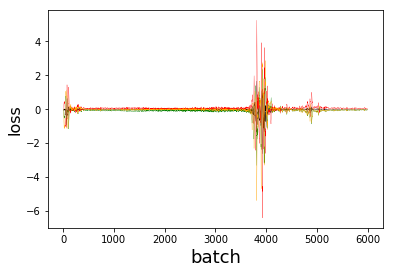

In [11]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

# plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()

In [12]:
def compare_images(img1, img2):
    return np.mean(np.abs(img1 - img2))

In [13]:

r, c = 5, 5

idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
true_imgs = (x_train[idx] + 1) *0.5

fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(true_imgs[cnt], cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1
fig.savefig(os.path.join(RUN_FOLDER, "images/real.png"))
plt.close()

In [14]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r * c, gan.z_dim))
gen_imgs = gan.generator.predict(noise)

#Rescale images 0 - 1

gen_imgs = 0.5 * (gen_imgs + 1)
# gen_imgs = np.clip(gen_imgs, 0, 1)

fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(np.squeeze(gen_imgs[cnt, :,:,:]), cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1
fig.savefig(os.path.join(RUN_FOLDER, "images/sample.png"))
plt.close()


fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        c_diff = 99999
        c_img = None
        for k_idx, k in enumerate((x_train + 1) * 0.5):
            
            diff = compare_images(gen_imgs[cnt, :,:,:], k)
            if diff < c_diff:
                c_img = np.copy(k)
                c_diff = diff
        axs[i,j].imshow(c_img, cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1

fig.savefig(os.path.join(RUN_FOLDER, "images/sample_closest.png"))
plt.close()